# descriptive.ipynb

This notebook calculated descriptive statistics in detail. The main notebook reports just a summary.

The `display_summary_table` and `plot_descriptive` functions below are called from the main notebook.

<br>
<br>

In [1]:
from IPython.display import display,Markdown #,HTML
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import pandas as pd


def display_title(s, pref='Figure', num=1, center=False):
    ctag = 'center' if center else 'p'
    s    = f'<{ctag}><span style="font-size: 1.2em;"><b>{pref} {num}</b>: {s}</span></{ctag}>'
    if pref=='Figure':
        s = f'{s}<br><br>'
    else:
        s = f'<br><br>{s}'
    display( Markdown(s) )



Below the previously developed `parse_data.ipynb` notebook is run. See that notebook for details.

In [2]:
%run parse_data.ipynb

df.describe()


,Hour,PM_US_Post,Dew_Point_Temperature,Humidity,Pressure,Temperature,Precipitation
count,26280.000000,25970.000000,26275.000000,25941.000000,25941.000000,26275.000000,25796.000000
mean,11.500000,94.094686,2.247916,53.607610,1016.328765,13.119696,38.815386
std,6.922318,93.806554,13.896571,25.857439,10.246494,11.759724,6226.148188
min,0.000000,1.000000,-40.000000,2.000000,991.000000,-17.000000,0.000000
25%,5.750000,27.000000,-9.000000,31.000000,1008.000000,3.000000,0.000000
50%,11.500000,66.000000,3.000000,54.000000,1016.000000,14.000000,0.000000
75%,17.250000,126.000000,15.000000,77.000000,1025.000000,23.000000,0.000000
max,23.000000,886.000000,27.000000,100.000000,1046.000000,42.000000,999990.000000


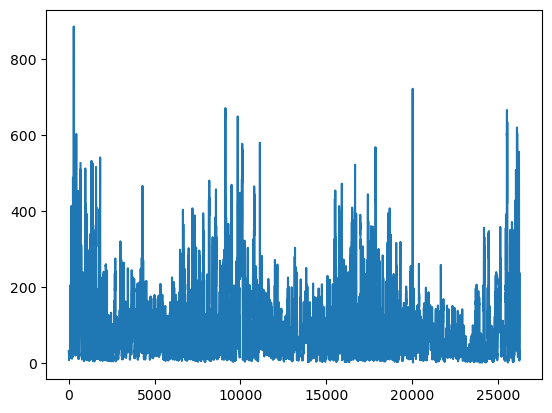

In [3]:
#　How the PM2.5 concentration fluctuated.(before deleting invalid row)
plt.figure()
plt.plot(df['PM_US_Post'])
plt.show()

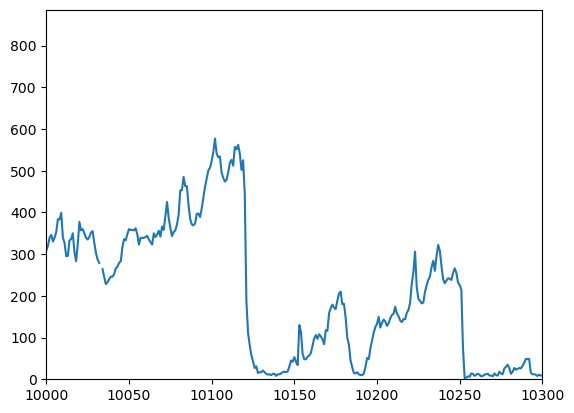

In [4]:
plt.figure()
plt.plot(df['PM_US_Post'])
plt.axis([10000,10300, 0, 886])
plt.show()

I did not find repetition due to night and day though I tried several intervals.

In [5]:
a = df.isnull().sum()
print(a)

Hour                       0
PM_US_Post               310
Dew_Point_Temperature      5
Humidity                 339
Pressure                 339
Temperature                5
Precipitation            484
dtype: int64


In [6]:
# Since I want to know relationships between weather and PM2.5 concentration, I will delete all row where there is at least one NaN
df = df.dropna(how='any')

In [7]:
print(df.isnull().sum())


Hour                     0
PM_US_Post               0
Dew_Point_Temperature    0
Humidity                 0
Pressure                 0
Temperature              0
Precipitation            0
dtype: int64


To create a custom display of descriptive statistics, let's first define functions that will calculate central tendency and dispersion metrics.

Refer also to [this notebook](https://github.com/0todd0000/OpenBook-DataAnalysisPracticeInPythonAndJupyter/blob/master/Lessons/Lesson04/5-Examples/DescriptiveStatsExamples.ipynb) for details regarding how create custom descriptive statistics tables.

In [8]:
def central(x, print_output=True):
    x0     = np.mean( x )
    x1     = np.median( x )
    x2     = stats.mode( x ).mode
    return x0, x1, x2


def dispersion(x, print_output=True):
    y0 = np.std( x ) # standard deviation
    y1 = np.min( x )  # minimum
    y2 = np.max( x )  # maximum
    y3 = y2 - y1      # range
    y4 = np.percentile( x, 25 ) # 25th percentile (i.e., lower quartile)
    y5 = np.percentile( x, 75 ) # 75th percentile (i.e., upper quartile)
    y6 = y5 - y4 # inter-quartile range
    return y0,y1,y2,y3,y4,y5,y6

<br>

Let's now assemble and display a central tendency table:

</br>

In [9]:
def display_central_tendency_table(num=1):
    display_title('Central tendency summary statistics.', pref='Table', num=num, center=False)
    df_central = df.apply(lambda x: central(x), axis=0)
    round_dict = {'PM_US Post':0, 'Hour':0, 'Dew_Point_Temperature':0, 'Humidity':0, 'Pressure':0, 'Temperature':0, 'Precipitation':1}
    df_central = df_central.round( round_dict )
    row_labels = 'mean', 'median', 'mode'
    df_central.index = row_labels
    display( df_central )

display_central_tendency_table(num=1)

<br><br><p><span style="font-size: 1.2em;"><b>Table 1</b>: Central tendency summary statistics.</span></p>

,Hour,PM_US_Post,Dew_Point_Temperature,Humidity,Pressure,Temperature,Precipitation
mean,11.0,93.893649,2.0,54.0,1016.0,13.0,0.1
median,11.0,66.000000,3.0,54.0,1016.0,14.0,0.0
mode,8.0,9.000000,18.0,88.0,1006.0,23.0,0.0


<br>

Let's repeat for a dispersion table:

</br>

In [10]:
def display_dispersion_table(num=1):
    display_title('Dispersion summary statistics.', pref='Table', num=num, center=False)
    round_dict            = {'Hour':1, 'PM_US Post':1, 'Dew_Point_Temperature':1, 'Humidity':1, 'Pressure':1, 'Temperature':1, 'Precipitation':1}
    df_dispersion         = df.apply(lambda x: dispersion(x), axis=0).round( round_dict )
    row_labels_dispersion = 'st.dev.', 'min', 'max', 'range', '25th', '75th', 'IQR'
    df_dispersion.index   = row_labels_dispersion
    display( df_dispersion )

display_dispersion_table(num=2)


<br><br><p><span style="font-size: 1.2em;"><b>Table 2</b>: Dispersion summary statistics.</span></p>

,Hour,PM_US_Post,Dew_Point_Temperature,Humidity,Pressure,Temperature,Precipitation
st.dev.,6.9,94.173935,14.0,25.8,10.3,11.8,0.6
min,0.0,1.000000,-40.0,2.0,991.0,-17.0,0.0
max,23.0,886.000000,26.0,100.0,1046.0,42.0,30.4
range,23.0,885.000000,66.0,98.0,55.0,59.0,30.4
25th,5.0,26.000000,-9.0,31.0,1008.0,3.0,0.0
75th,18.0,126.000000,15.0,76.0,1025.0,23.0,0.0
IQR,13.0,100.000000,24.0,45.0,17.0,20.0,0.0


Let's save the variables in easier-to-use variable names:

In [11]:
y    = df['PM_US_Post']
HOUR = df['Hour']
DEWP = df['Dew_Point_Temperature']
HUMI = df['Humidity']
PRES = df['Pressure']
TEMP = df['Temperature']
PREC = df['Precipitation']

Let's create scatterplots for the DV (quality) vs. each of the three IVs (acid, density, sugar):

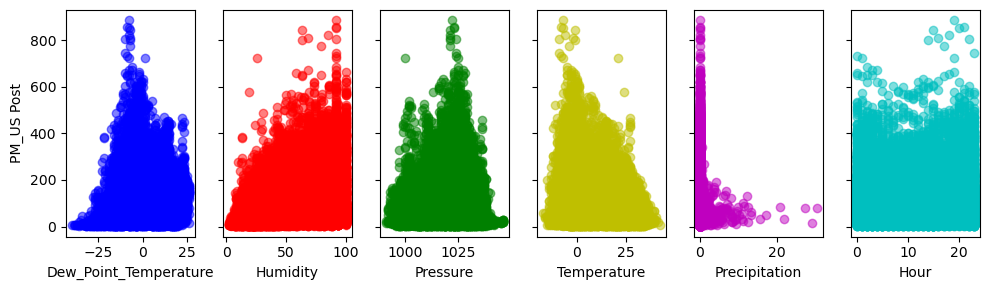

In [12]:

fig,axs = plt.subplots( 1, 6, figsize=(10,3), tight_layout=True )
axs[0].scatter( DEWP, y, alpha=0.5, color='b' )
axs[1].scatter( HUMI, y, alpha=0.5, color='r' )
axs[2].scatter( PRES, y, alpha=0.5, color='g' )
axs[3].scatter( TEMP, y, alpha=0.5, color='y' )
axs[4].scatter( PREC, y, alpha=0.5, color='m' )
axs[5].scatter( HOUR, y, alpha=0.5, color='c' )
xlabels = 'Dew_Point_Temperature', 'Humidity', 'Pressure', 'Temperature', 'Precipitation', 'Hour'
[ax.set_xlabel(s) for ax,s in zip(axs,xlabels)]
axs[0].set_ylabel('PM_US Post')
[ax.set_yticklabels([])  for ax in axs[1:]]
plt.show()




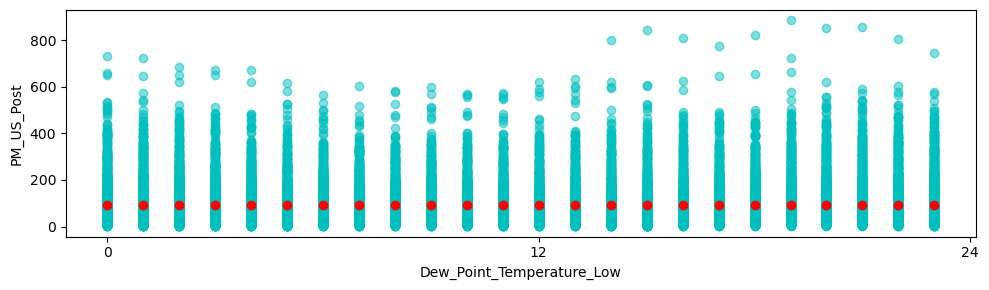

In [13]:
fig,axs = plt.subplots( 1, 1, figsize=(10,3), tight_layout=True )
axs.scatter( HOUR, y, alpha=0.5, color='c' )

xlabels = 'Dew_Point_Temperature_Low'
axs.set_xlabel(xlabels) 

axs.set_xticks([0,12,24])
axs.set_ylabel('PM_US_Post')

[axs.plot(q, y.mean(), 'ro')  for q in range(0, 24)]

plt.show()

Again, there seems not to be difference between night and day through the three-year period
Let's make xticks easier to read:

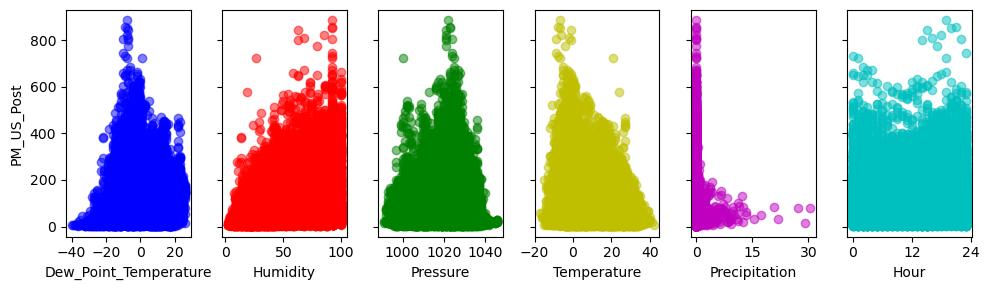

In [14]:
fig,axs = plt.subplots( 1, 6, figsize=(10,3), tight_layout=True )
axs[0].scatter( DEWP, y, alpha=0.5, color='b' )
axs[1].scatter( HUMI , y, alpha=0.5, color='r' )
axs[2].scatter( PRES, y, alpha=0.5, color='g' )
axs[3].scatter( TEMP, y, alpha=0.5, color='y' )
axs[4].scatter( PREC, y, alpha=0.5, color='m' )
axs[5].scatter( HOUR, y, alpha=0.5, color='c' )
xlabels = 'Dew_Point_Temperature', 'Humidity', 'Pressure', 'Temperature', 'Precipitation', 'Hour'
[ax.set_xlabel(s) for ax,s in zip(axs,xlabels)]
axs[0].set_xticks([-40, -20, 0, 20])
axs[1].set_xticks([0, 50, 100])
axs[2].set_xticks([1000, 1020, 1040])
axs[3].set_xticks([-20, 0, 20, 40])
axs[4].set_xticks([0, 15, 30])
axs[5].set_xticks([0, 12, 24])
axs[0].set_ylabel('PM_US_Post')
[ax.set_yticklabels([])  for ax in axs[1:]]
plt.show()

Next let's add regression lines and correlation coefficients to each plot:

In [15]:
def corrcoeff(x, y):
    r = np.corrcoef(x, y)[0,1]
    return r

def plot_regression_line(ax, x, y, **kwargs):
    a,b   = np.polyfit(x, y, deg=1)
    x0,x1 = min(x), max(x)
    y0,y1 = a*x0 + b, a*x1 + b
    ax.plot([x0,x1], [y0,y1], **kwargs)


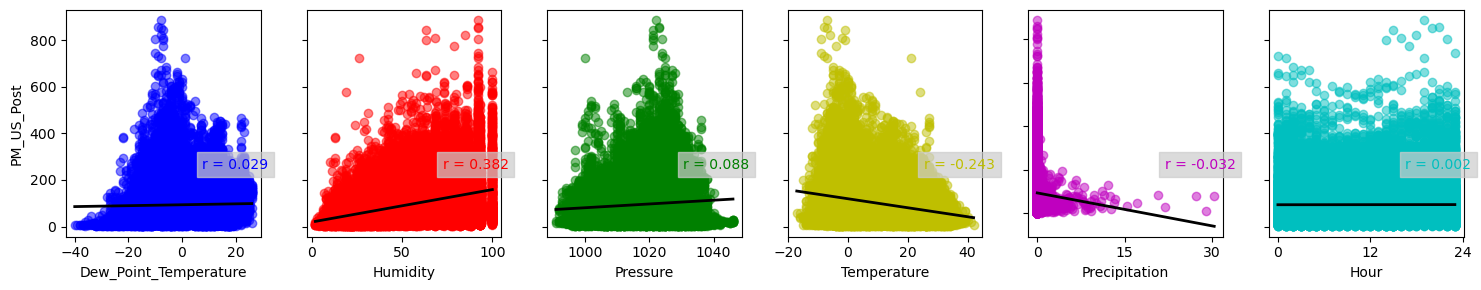

In [16]:
    
fig,axs = plt.subplots( 1,6 , figsize=(15,3), tight_layout=True )
ivs     = [DEWP, HUMI, PRES, TEMP, PREC, HOUR]
colors  = 'b', 'r', 'g', 'y', 'm','c'
for ax,x,c in zip(axs, ivs, colors):
    ax.scatter( x, y, alpha=0.5, color=c )
    plot_regression_line(ax, x, y, color='k', ls='-', lw=2)
    r   = corrcoeff(x, y)
    ax.text(0.7, 0.3, f'r = {r:.3f}', color=c, transform=ax.transAxes, bbox=dict(color='0.8', alpha=0.7))

xlabels = 'Dew_Point_Temperature', 'Humidity', 'Pressure', 'Temperature', 'Precipitation', 'Hour'
[ax.set_xlabel(s) for ax,s in zip(axs,xlabels)]
axs[0].set_xticks([-40, -20, 0, 20])
axs[1].set_xticks([0, 50, 100])
axs[2].set_xticks([1000, 1020, 1040])
axs[3].set_xticks([-20, 0, 20, 40])
axs[4].set_xticks([0, 15, 30])
axs[5].set_xticks([0, 12, 24])
axs[0].set_ylabel('PM_US_Post')
[ax.set_yticklabels([])  for ax in axs[1:]]
plt.show()


The correlation coefficients are all relatively low, suggesting no clear linear correlation between the DV and IVs.

However, in the Dew_Point_Temperature data (the left panel above) it appears that there may be opposite trends for low-DEWP (DEWP <= -8) and high-DEWP (DEWP > -8 ) conditions. Also, in the precipitation data (the second right panel above) it seems that there may be opposite trends for low-y and high-y. Let's plot PM2.5 concentration vs. DEWP and Precipitation separately for the low- and high- groups, along with linear regression trends.

<function matplotlib.pyplot.show(close=None, block=None)>

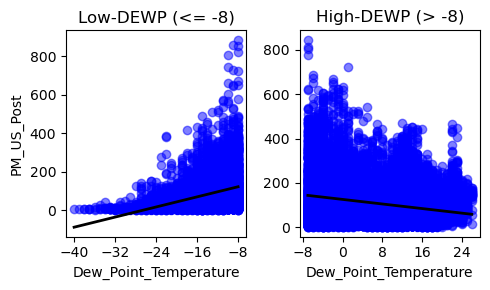

In [17]:
i_low  = DEWP <= -8  
i_high = DEWP > -8   

fig,axs = plt.subplots( 1, 2, figsize=(5,3), tight_layout=True )

for ax,i in zip(axs, [i_low, i_high]):
    ax.scatter( DEWP[i], y[i], alpha=0.5, color='b' )
for ax,i in zip(axs, [i_low, i_high]):
    plot_regression_line(ax, DEWP[i], y[i], color='k', ls='-', lw=2)

[ax.set_xlabel('Dew_Point_Temperature') for ax in axs] 
axs[0].set_ylabel('PM_US_Post') 

axs[0].set_title('Low-DEWP (<= -8)')
axs[1].set_title('High-DEWP (> -8)')

axs[0].set_xticks([-40, -32, -24, -16, -8])
axs[1].set_xticks([-8, 0, 8, 16, 24])
plt.show

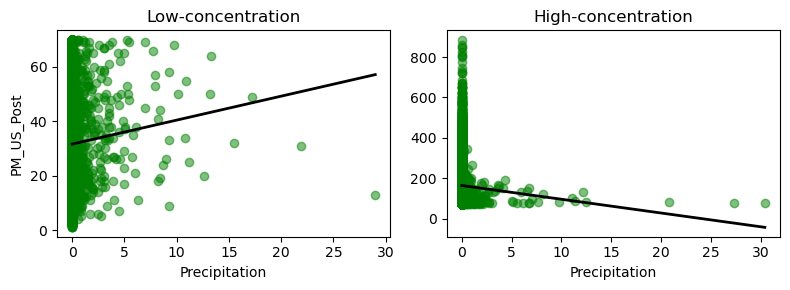

In [18]:
PM_low     = y <= 70
PM_high    = y > 70 

fig,axs = plt.subplots( 1, 2, figsize=(8,3), tight_layout=True )
PM       = [PREC]
for ax,PM in zip(axs, [PM_low, PM_high]):
    ax.scatter( PREC[PM], y[PM], alpha=0.5, color='g' )
    plot_regression_line(ax, PREC[PM], y[PM], color='k', ls='-', lw=2)
[ax.set_xlabel('Precipitation')  for ax in axs] 
axs[0].set_title('Low-concentration')
axs[0].set_ylabel('PM_US_Post')
axs[1].set_title('High-concentration')
plt.show()

The linear trend lines in the figures above appear to agree with the visual patterns:

- The higher dew points temperature is, the higher the PM2.5 concentration is in low dew point temperature conditions and vice varsa in high dew point temperature conditions
- The more precipitation, the denser PM2.5 when its concentration is low and vice varsa when it is high

But the correlation coefficients are still relatively low. I may need to separate data according to some criterion or even change the way to analysis.

These analyses show that the trends associated with just the means or the trends as a whole dataset are unclear.

Let's now assemble all results into a single figure for reporting purposes:

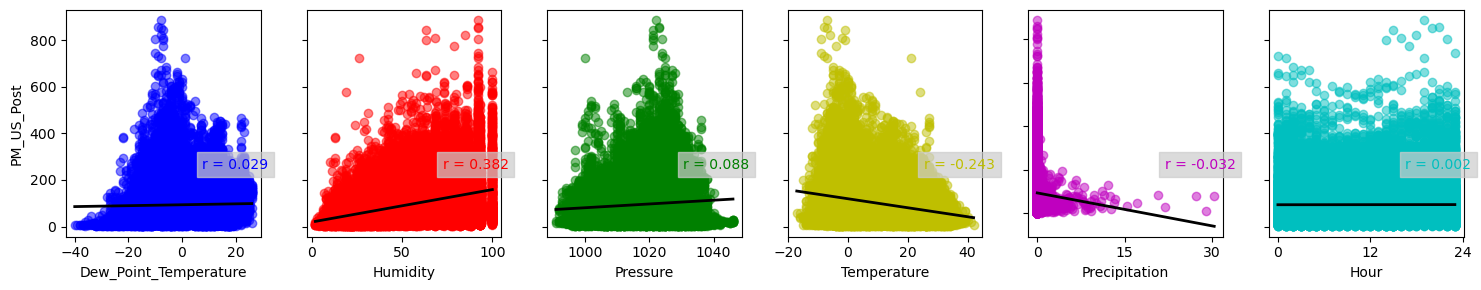

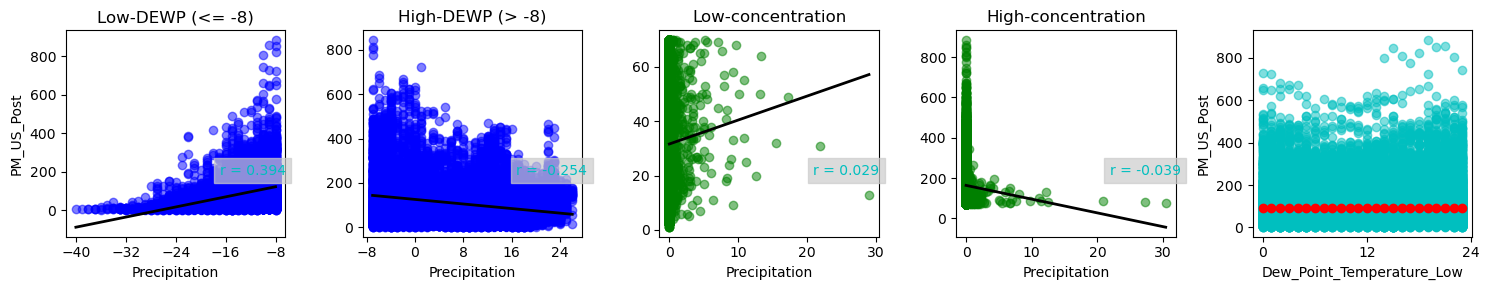

In [19]:
def plot_descriptive():
    fig,axs = plt.subplots( 1, 6, figsize=(15,3), tight_layout=True )
    ivs     = [DEWP, HUMI, PRES, TEMP, PREC, HOUR]
    colors  = 'b', 'r', 'g', 'y', 'm','c'
    for ax,x,c in zip(axs, ivs, colors):
        ax.scatter( x, y, alpha=0.5, color=c )
        plot_regression_line(ax, x, y, color='k', ls='-', lw=2)
        r   = corrcoeff(x, y)
        ax.text(0.7, 0.3, f'r = {r:.3f}', color=c, transform=ax.transAxes, bbox=dict(color='0.8', alpha=0.7))
    
    xlabels = 'Dew_Point_Temperature', 'Humidity', 'Pressure', 'Temperature', 'Precipitation', 'Hour'
    [ax.set_xlabel(s) for ax,s in zip(axs,xlabels)]
    axs[0].set_xticks([-40, -20, 0, 20])
    axs[1].set_xticks([0, 50, 100])
    axs[2].set_xticks([1000, 1020, 1040])
    axs[3].set_xticks([-20, 0, 20, 40])
    axs[4].set_xticks([0, 15, 30])
    axs[5].set_xticks([0, 12, 24])
    axs[0].set_ylabel('PM_US_Post')
    [ax.set_yticklabels([])  for ax in axs[1:]]
    plt.show()


    fig,axs = plt.subplots( 1, 5, figsize=(15,3), tight_layout=True )
    i_low  = DEWP <= -8  
    i_high = DEWP > -8   
    
    for ax,i in zip([axs[0],axs[1]], [i_low, i_high]):
        ax.scatter( DEWP[i], y[i], alpha=0.5, color='b' )
        plot_regression_line(ax, DEWP[i], y[i], color='k', ls='-', lw=2)
        r   = corrcoeff(DEWP[i], y[i])
        ax.text(0.7, 0.3, f'r = {r:.3f}', color=c, transform=ax.transAxes, bbox=dict(color='0.8', alpha=0.7))


    [ax.set_xlabel('Dew_Point_Temperature') for ax in axs] 
    axs[0].set_ylabel('PM_US_Post') 

    axs[0].set_title('Low-DEWP (<= -8)')
    axs[1].set_title('High-DEWP (> -8)')

    axs[0].set_xticks([-40, -32, -24, -16, -8])
    axs[1].set_xticks([-8, 0, 8, 16, 24])
    
    
    PM_low     = y <= 70
    PM_high    = y > 70 
    PM       = [PREC]
    for ax,PM in zip([axs[2],axs[3]], [PM_low, PM_high]):
        ax.scatter( PREC[PM], y[PM], alpha=0.5, color='g' )
        plot_regression_line(ax, PREC[PM], y[PM], color='k', ls='-', lw=2)
        r   = corrcoeff(PREC[PM], y[PM])
        ax.text(0.7, 0.3, f'r = {r:.3f}', color=c, transform=ax.transAxes, bbox=dict(color='0.8', alpha=0.7))
    [ax.set_xlabel('Precipitation')  for ax in axs] 
    axs[2].set_title('Low-concentration')
    axs[3].set_title('High-concentration')
    
    axs[4].scatter( HOUR, y, alpha=0.5, color='c' )
    xlabels = 'Dew_Point_Temperature_Low'
    axs[4].set_xlabel(xlabels) 

    axs[4].set_xticks([0,12,24])
    axs[4].set_ylabel('PM_US_Post')

    [axs[4].plot(q, y.mean(), 'ro')  for q in range(0, 24)]


    plt.show


    



    
    
plot_descriptive()